In [2]:
import pandas as pd
import numpy as np
import nltk
import pyodbc
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# created a user defined function to get data from sql db
def getDatafromSQL():
    # prepared requried parameter for SQL connection
    connection_str = ("Driver={SQL Server};Server=Sanam-Kandar\SQLEXPRESS;Database=PortfolioProject_MarketingAnalytics;Trusted_Connection=yes;")
    
    # we establish connection with SQL db from Jupyter notebook
    conn = pyodbc.connect(connection_str)
    
    # stored SQL query into variable > SQL statement within " " 
    query = "Select * from customer_reviews"
    
    # Fetch data from SQL database through pandas two parameter needed SQL query and connection
    # we stored the data into varible

    fetched_data = pd.read_sql(sql=query,con=conn)
    
    # We closed the connection with DB
    conn.close()
    
    return fetched_data
    
    

In [4]:
customer_review_data = getDatafromSQL()

customer_review_data

C:\Users\Sanam\AppData\Local\Temp\ipykernel_38476\1476906133.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fetched_data = pd.read_sql(sql=query,con=conn)


,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special."
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.


In [5]:
# created a funtion to calculate sentiment score range b/w -1(negative) to +1(postive)
def calculate_vaderSentiment(review):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)['compound']
    return sentiment_score

In [6]:
# Apply vader sentiment analysis function to calculate sentiment scores for each review
customer_review_data["ReviewSentimentScore"] = customer_review_data.ReviewText.apply(calculate_vaderSentiment)

In [7]:
customer_review_data

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,ReviewSentimentScore
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089
...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000


In [8]:
# Wrapped up if else ladder with UDF function for categorization of sentiment with customer rating
def ReviewSentimentCategory(reviewScore, reviewRating):
    if reviewScore > 0.5: ## Positive Score Category 0.51 to 1.0
        if reviewRating >= 4:
            return 'Positive' # highly positive - Sentiment And Rating both are HIGH
        elif reviewRating == 3:
            return 'Mixed Positive' # mixed positive - Sentiment HIGH And Rating NEUTRAL
        else:
            return 'Mixed Negative' # Sentiment HIGH And Rating Low
    elif reviewScore < -0.5: ## Negative Score Category -1.0 to -0.51
        if reviewRating <= 2:
            return 'Negative' # highly Negative - Sentiment And Rating both are LOW
        elif reviewRating == 3:
            return 'Mixed Negative' # mixed Negative - Sentiment LOW And Rating NEUTRAL
        else:
            return 'Mixed Positive' # Sentiment LOW And Rating HIGH   
    else:                           ## Neutral Score Category -0.5 to 0.5
        if reviewRating >= 4: 
            return 'Positive' #  Sentiment NEUTRAL And Rating both are HIGH
        elif reviewRating <= 2:
            return 'Negative' #  Sentiment NEUTRAL And Rating LOW
        else:
            return 'Neutral' #  Sentiment NEUTRAL And Rating NEUTRAL


In [9]:
# Categorize the score into Positive , Neutral and Negative
customer_review_data["ReviewSentimentCategory"] = customer_review_data.apply(lambda x: ReviewSentimentCategory(x["ReviewSentimentScore"], x["Rating"]),
                                                                             axis=1)
customer_review_data

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,ReviewSentimentScore,ReviewSentimentCategory
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Neutral
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Neutral
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Neutral
...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Neutral
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative


In [10]:
# Created a function to bucket sentiment scores into text ranges
def sentimentScoreBucket(reviewScore):
    if reviewScore >= 0.5:     
        return "0.5 to 1.0"
    elif (reviewScore  >= 0.0) and (reviewScore  < 0.5) :  
        return "0.0 to 0.49"
    elif (reviewScore < 0.0) and (reviewScore >= -0.5):
        return "-0.49 to 0.0"
    else:
        return "-0.1 to -0.5"
    

In [11]:
customer_review_data["ReviewScoreBucket"] = customer_review_data.ReviewSentimentScore.apply(sentimentScoreBucket)
customer_review_data

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,ReviewSentimentScore,ReviewSentimentCategory,ReviewScoreBucket
0,1,77,18,2023-12-23,3,"Average experience, nothing special.",-0.3089,Neutral,-0.49 to 0.0
1,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive,0.0 to 0.49
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive,0.0 to 0.49
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.",0.2382,Neutral,0.0 to 0.49
4,5,64,2,2023-07-16,3,"Average experience, nothing special.",-0.3089,Neutral,-0.49 to 0.0
...,...,...,...,...,...,...,...,...,...
1358,1359,28,4,2023-05-25,3,Not worth the money.,-0.1695,Neutral,-0.49 to 0.0
1359,1360,58,12,2023-11-13,2,"Average experience, nothing special.",-0.3089,Negative,-0.49 to 0.0
1360,1361,96,15,2023-03-07,5,Customer support was very helpful.,0.6997,Positive,0.5 to 1.0
1361,1362,99,2,2025-12-03,1,Product did not meet my expectations.,0.0000,Negative,0.0 to 0.49


<Axes: ylabel='ReviewScoreBucket'>

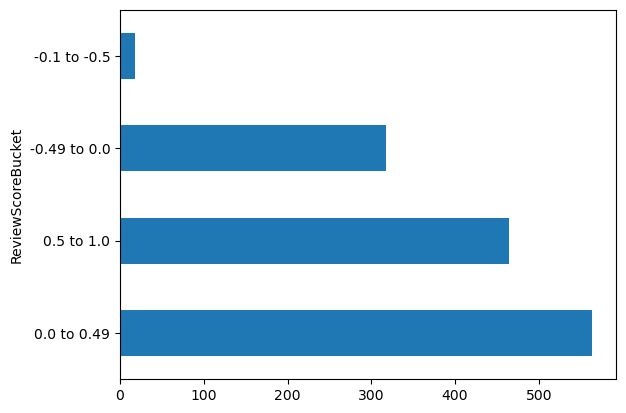

In [12]:
customer_review_data.ReviewScoreBucket.value_counts().plot(kind="barh")

In [14]:
# saving the file local folder
customer_review_data.to_csv("D:\Ali Ahmed Marketing project\ReviewSentiment_Analysis.csv")